In [ ]:
#Importamos las librerías necesarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#IMPORTAMOS LA BASE DE DATOS Y CREAMOS EL DATA FRAME


In [ ]:
#Recuerda activar tu Drive en el panel de la izquierda y copiar el path del archivo csv
df = pd.read_csv('/content/Crehana - Netflix Dataset.csv', index_col = 0)

color_Netflix ='#E50914'

In [ ]:
#Este es el dataset con el que estaremos trabajando
print("df Shape:",df.shape)
df.sample(5)

df Shape: (6546, 10)


,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
3003,Slave Girls from Beyond Infinity,1987,movie,Action,45,1423.0,United States,English,74.0,Ken Dixon
657,Self Portrait,1988,movie,Animation,66,366.0,United States,English,6.0,Bill Plympton
2501,Cilantro y perejil,1996,movie,Comedy,65,411.0,Mexico,Spanish,90.0,Rafael Montero
3251,Hot Boyz,2000,movie,Action,42,1140.0,United States,English,98.0,Master P
2370,WWF: 'Cause Stone Cold Said So!,1997,movie,Sport,76,56.0,United States,English,NaN,NaN


#¿Cuántos géneros hay?


In [ ]:
#value_counts() saca la cantidad de veces que se repite cada género

df["genero"].value_counts()

Comedy         1260
Drama          1215
Documentary    1205
Action          886
Animation       653
Crime           328
Horror          278
Musical         229
Adventure       187
Short            98
Fantasy          59
Family           55
Sport            42
Mystery          27
Reality-TV       24
Name: genero, dtype: int64

In [ ]:
#value_counts() saca la cantidad de veces que se repite cada género con normalize saca %

df["genero"].value_counts(normalize = True)

Comedy         0.192484
Drama          0.185610
Documentary    0.184082
Action         0.135350
Animation      0.099756
Crime          0.050107
Horror         0.042469
Musical        0.034983
Adventure      0.028567
Short          0.014971
Fantasy        0.009013
Family         0.008402
Sport          0.006416
Mystery        0.004125
Reality-TV     0.003666
Name: genero, dtype: float64

###Organizando nuestros datos antes de graficar

In [ ]:
titulos_por_genero = df.genero.value_counts(normalize = True).sort_index()

promedio_rating_genero = df.rating.groupby(df['genero']).mean().sort_values(ascending = False)

print(titulos_por_genero)
print('------')
print(promedio_rating_genero)

Action         0.135350
Adventure      0.028567
Animation      0.099756
Comedy         0.192484
Crime          0.050107
Documentary    0.184082
Drama          0.185610
Family         0.008402
Fantasy        0.009013
Horror         0.042469
Musical        0.034983
Mystery        0.004125
Reality-TV     0.003666
Short          0.014971
Sport          0.006416
Name: genero, dtype: float64
------
genero
Musical        79.082969
Documentary    73.736929
Sport          73.357143
Short          72.887755
Animation      69.075038
Crime          66.963415
Drama          66.649383
Family         65.418182
Mystery        63.962963
Comedy         63.627778
Adventure      61.951872
Action         61.612867
Reality-TV     59.000000
Fantasy        54.186441
Horror         50.219424
Name: rating, dtype: float64


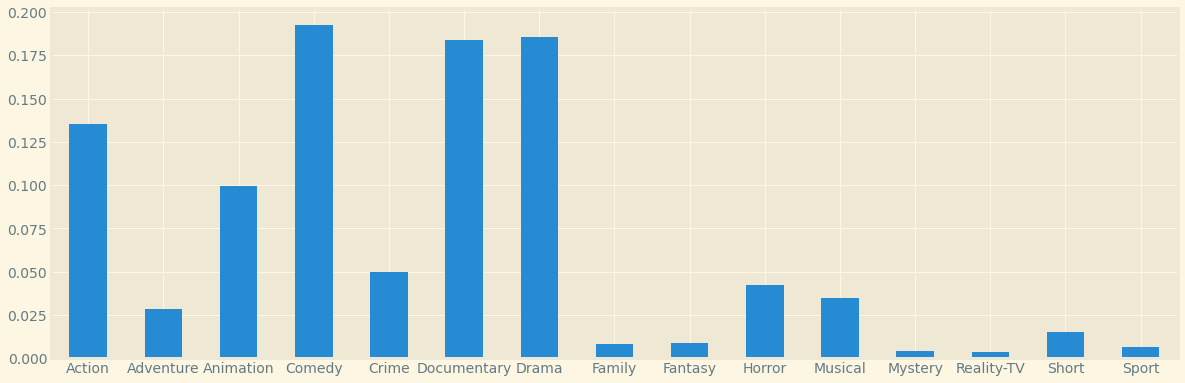

In [ ]:
plt.style.use('Solarize_Light2')
plt.figure(figsize = (18, 6))

titulos_por_genero.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()

###Segmentar y Graficar nuestros datos

In [ ]:
#Creamos nuestras variables títulos de acción por año y sus ejes en X

comedia = df[df['genero'] == 'Comedy']
drama = df[df['genero'] == 'Drama']

x_comedia_serie = comedia.año.value_counts().sort_index(ascending = True)
x_drama_serie = drama.año.value_counts().sort_index(ascending = True)


In [ ]:
#Vemos cómo queda nuestra variable
x_comedia_serie

1918     3
1923     1
1924     1
1925     1
1928     1
        ..
2017     4
2018     7
2019     3
2020    13
2021     8
Name: año, Length: 94, dtype: int64

In [ ]:
x_drama_serie

1916     1
1919     1
1925     1
1926     1
1927     2
        ..
2017    10
2018    15
2019     8
2020    12
2021     9
Name: año, Length: 94, dtype: int64

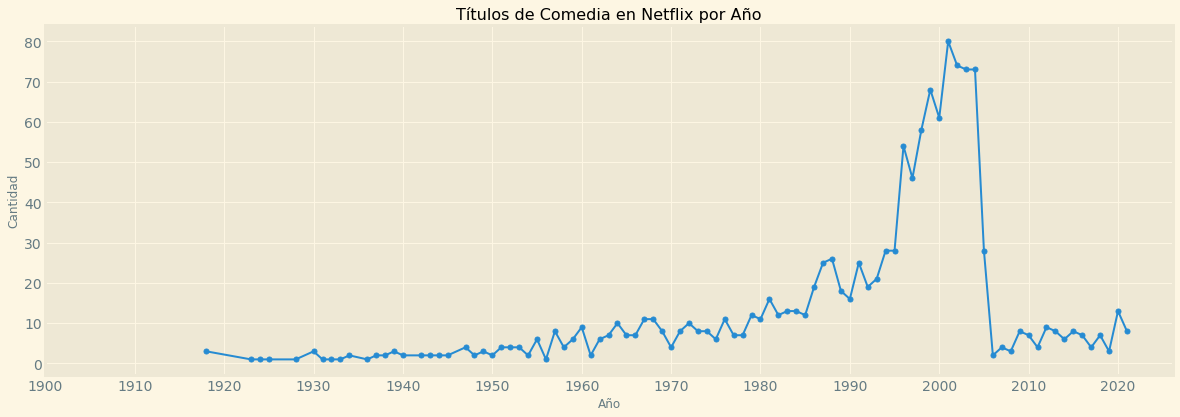

In [ ]:
#Graficamos la primera variable: títulos de acción por año
fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')
fig.set_size_inches(18,6)

ax.plot(x_comedia_serie, label = 'comedia', marker = 'o', markersize = 5, linewidth = 2)

ax.set_title('Títulos de Comedia en Netflix por Año', fontdict= {"color":"black"})
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

xinterval = np.arange(1900,2021,10)
ax.set_xticks(xinterval)

plt.show()

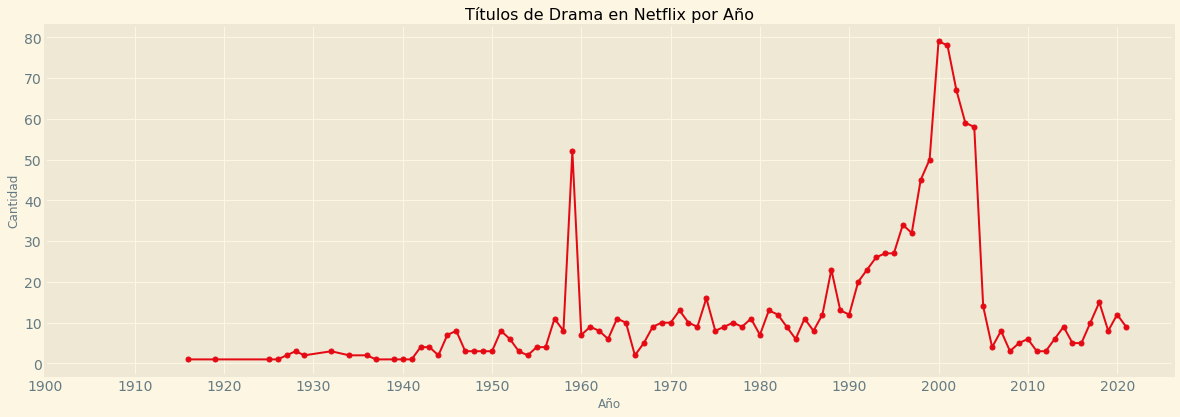

In [ ]:
#Graficamos la segunda variable: documentales por año

fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')
fig.set_size_inches(18,6)

ax.plot(x_drama_serie, marker = 'o', markersize = 5, linewidth = 2, color = color_Netflix)

ax.set_title('Títulos de Drama en Netflix por Año', fontdict= {"color":"black"})
ax.set_xlabel('Año')
ax.set_ylabel('Cantidad')

xinterval = np.arange(1900,2021,10)
ax.set_xticks(xinterval)

plt.show()

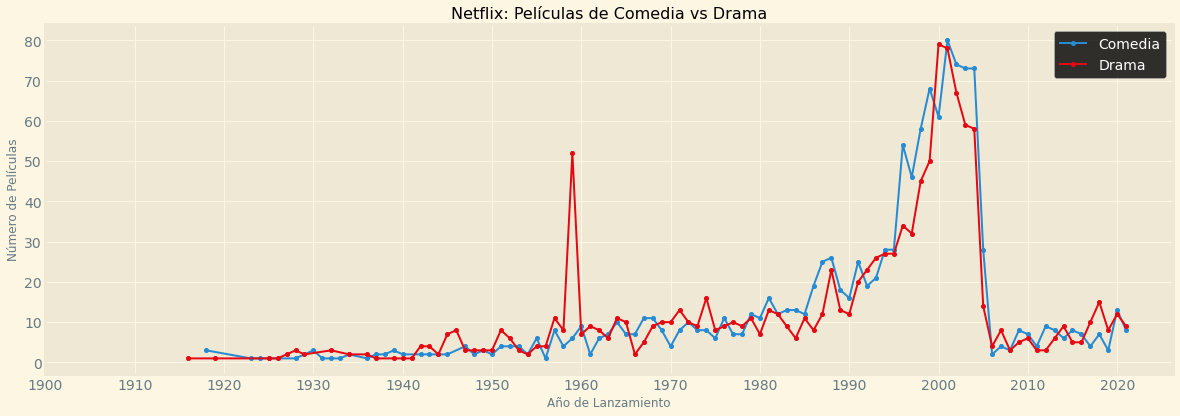

In [ ]:
#Colocamos nuestras dos variables en un sólo gráfico
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(18,6)

ax.plot(x_comedia_serie, label = 'Comedia', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(x_drama_serie, label = 'Drama', marker = 'o', markersize = 4, linewidth = 2, color = color_Netflix)

xinterval = np.arange(1900,2022,10)

ax.set_title('Netflix: Películas de Comedia vs Drama', fontdict= {"color":"black"})
ax.legend(facecolor ="black")
ax.set_xticks(xinterval)
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Número de Películas')
plt.show()

#PARTE 1 PROYECTO

Como primer ejercicio, crearás una serie de tiempo mostrando solo las películas y series en el dataset junto con un tablero que muestre la misma información, pero para 4 géneros distintos. Puedes hacer el tablero en cuatro gráficos, o dos gráficos con dos géneros cada uno.

In [ ]:
df

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
0,Dinosaur Planet,2003,mini series,Documentary,77,474.0,United States,English,50.0,NaN
1,Character,2021,movie,Crime,83,46.0,Japan,Japanese,125.0,Akira Nagai
2,Get Up and Dance!,1994,movie,Family,81,18.0,United States,English,54.0,Steve Purcell
3,The Rise and Fall of El Chapo,2016,movie,Documentary,69,42.0,United States,English,85.0,NaN
4,8 Man,1992,movie,Action,55,93.0,Japan,Japanese,83.0,Yasuhiro Horiuchi
...,...,...,...,...,...,...,...,...,...,...
6942,Lightning Bug,2004,movie,Drama,65,1304.0,United States,English,NaN,Robert Hall
6943,Gattaca,1997,movie,Drama,78,289781.0,United States,English,NaN,Andrew Niccol
6944,Interiors,1978,movie,Drama,74,19143.0,United States,English,NaN,Woody Allen
6945,All Monsters Attack,1969,movie,Adventure,39,4384.0,Japan,Japanese,NaN,IshirÃ´ Honda


In [ ]:
df[df["genero"] == "Accion"]

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director


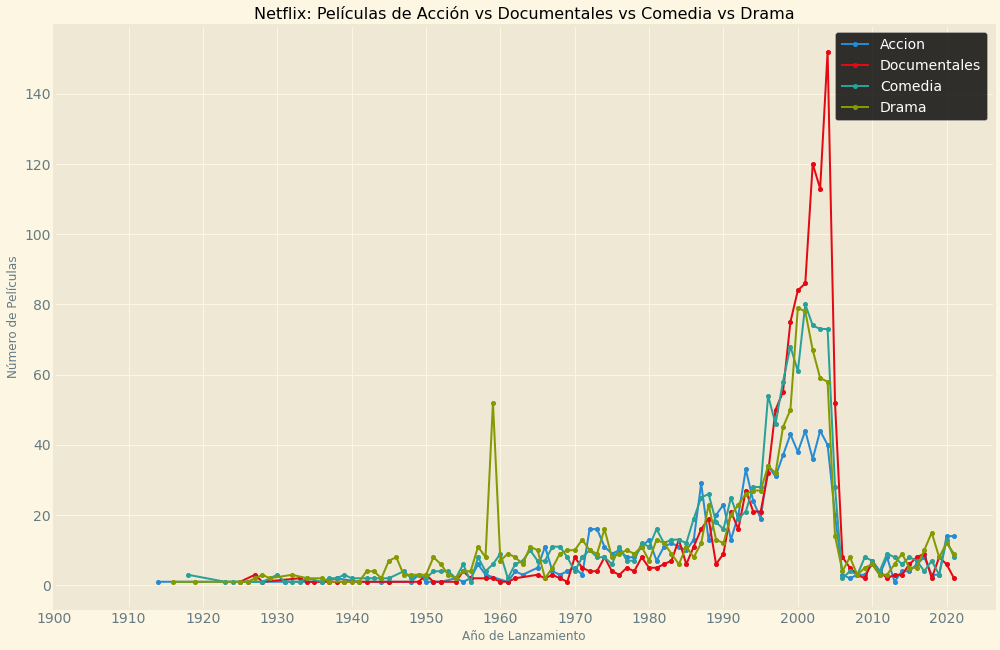

In [ ]:
# 4 GENEROS EN UNA SOLA GRÁFICA

accion = df[df['genero'] == 'Action']
docs = df[df['genero'] == 'Documentary']
comedia = df[df['genero'] == 'Comedy']
drama = df[df['genero'] == 'Drama']

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.plot(accion.año.value_counts().sort_index(ascending = True), label = 'Accion', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(docs.año.value_counts().sort_index(ascending = True), label = 'Documentales', marker = 'o', markersize = 4, linewidth = 2, color = color_Netflix)
ax.plot(comedia.año.value_counts().sort_index(ascending = True), label = 'Comedia', marker = 'o', markersize = 4, linewidth = 2)
ax.plot(drama.año.value_counts().sort_index(ascending = True), label = 'Drama', marker = 'o', markersize = 4, linewidth = 2)


xinterval = np.arange(1900,2022,10)
ax.set_xticks(xinterval)

ax.set_title('Netflix: Películas de Acción vs Documentales vs Comedia vs Drama', fontdict= {"color":"black"})
ax.legend(facecolor ="black")
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Número de Películas')
plt.show()

#Módulo 4: Observando en Profundidad

In [ ]:
#Hacemos zoom in en un período de tiempo

periodo = df[df['año'] >= 2000]
periodo.sample(10)

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
4378,The Land Before Time VIII: The Big Freeze,2001,movie,Animation,59,2389.0,United States,English,75.0,Charles Grosvenor
854,Naked States,2000,movie,Documentary,63,508.0,United States,English,80.0,Arlene Nelson
1359,The Innocent,2021,mini series,Crime,79,22753.0,Spain,Spanish,467.0,NaN
105,Lennon Legend: The Very Best of John Lennon,2003,movie,Documentary,79,164.0,United States,English,100.0,Simon Hilton
2127,Willie Nelson: Live at Billy Bob's Texas,2004,movie,Documentary,82,8.0,United States,English,84.0,Michael Drumm
5196,The Thing Below,2004,movie,Action,24,1001.0,Canada,English,NaN,Jim Wynorski
407,Take Me Home: The John Denver Story,2000,movie,Documentary,60,523.0,United States,English,90.0,Jerry London
5823,Lust for Dracula,2004,movie,Horror,34,335.0,United States,English,NaN,Tony Marsiglia
4286,Close to Leo,2002,movie,Drama,69,1063.0,France,French,88.0,Christophe HonorÃ©
6110,It Had to Be You: The Great American Songbook,2002,movie,Musical,79,9.0,United States,English,NaN,Lawrence Jordan


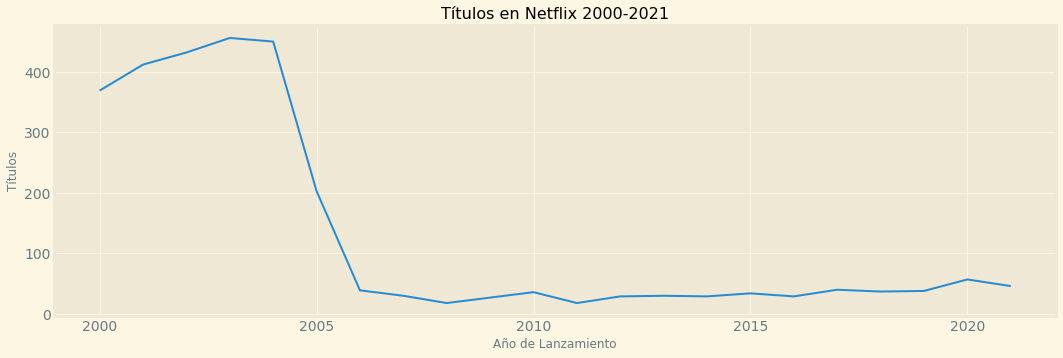

In [ ]:

periodo_serie_x = periodo.año.value_counts().sort_index()

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()

fig.set_size_inches(16,5)
ax.set_title('Títulos en Netflix 2000-2021',  fontdict= {"color":"black"})

ax.plot(periodo_serie_x)
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Títulos')

plt.show()

###Creamos un Gráfico de Barra

In [ ]:
prg_periodo = periodo.rating.groupby(df['genero']).mean().sort_values(ascending = False)

prg_periodo

genero
Musical        79.239130
Short          74.380952
Sport          73.631579
Documentary    73.110949
Animation      68.377301
Family         64.257143
Crime          63.411765
Drama          61.388412
Comedy         61.246939
Reality-TV     59.727273
Action         57.185668
Adventure      56.790698
Mystery        54.800000
Fantasy        48.833333
Horror         40.884615
Name: rating, dtype: float64

In [ ]:
#Crearemos un objeto inicial
periodo_agrupado = periodo.rating.groupby(periodo['genero'])

#Vamos a crear primero nuestros valores del eje x y del eje y
x_barra = periodo_agrupado.mean().sort_values(ascending = False).index
y_barra = periodo_agrupado.mean().sort_values(ascending = False)

#Ahora vamos a crear una variable con la desviación estándar de nuestros valores
desviacion_std = periodo_agrupado.std()
error = pd.concat([y_barra, desviacion_std], keys = ['rating', 'dv_std'], axis = 1)

In [ ]:
x_barra

Index(['Musical', 'Short', 'Sport', 'Documentary', 'Animation', 'Family',
       'Crime', 'Drama', 'Comedy', 'Reality-TV', 'Action', 'Adventure',
       'Mystery', 'Fantasy', 'Horror'],
      dtype='object', name='genero')

In [ ]:
y_barra

genero
Musical        79.239130
Short          74.380952
Sport          73.631579
Documentary    73.110949
Animation      68.377301
Family         64.257143
Crime          63.411765
Drama          61.388412
Comedy         61.246939
Reality-TV     59.727273
Action         57.185668
Adventure      56.790698
Mystery        54.800000
Fantasy        48.833333
Horror         40.884615
Name: rating, dtype: float64

In [ ]:
desviacion_std

genero
Action         15.155233
Adventure      15.486643
Animation       8.065995
Comedy         12.552313
Crime          14.973090
Documentary     9.835754
Drama          11.870873
Family         11.682926
Fantasy        11.152684
Horror         13.332425
Musical        10.956153
Mystery        14.411801
Reality-TV     15.443235
Short          13.263373
Sport          11.293196
Name: rating, dtype: float64

In [ ]:
error

,rating,dv_std
genero,,
Musical,79.239130,10.956153
Short,74.380952,13.263373
Sport,73.631579,11.293196
Documentary,73.110949,9.835754
Animation,68.377301,8.065995
Family,64.257143,11.682926
Crime,63.411765,14.973090
Drama,61.388412,11.870873
Comedy,61.246939,12.552313


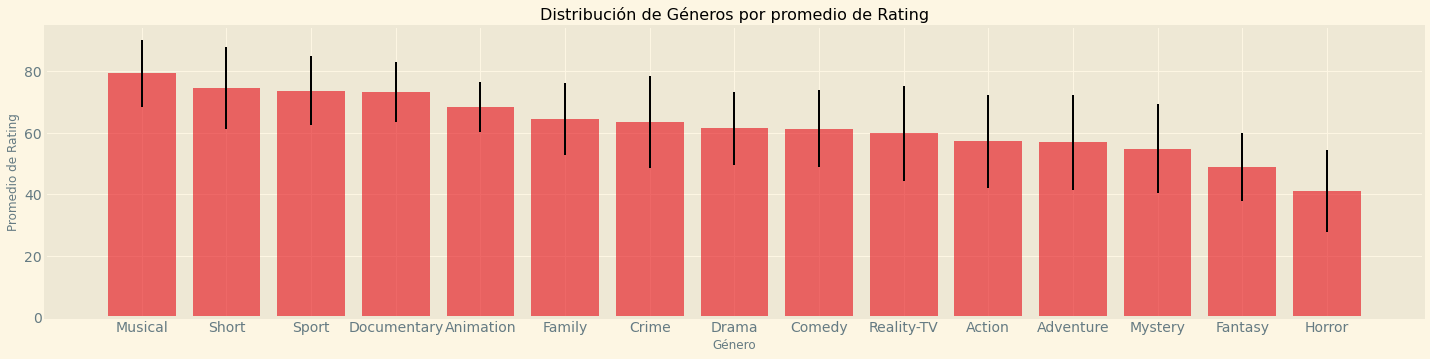

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(22,5)

ax.bar(x_barra, y_barra, yerr = error['dv_std'],color = color_Netflix, alpha = 0.6 )
ax.set_title('Distribución de Géneros por promedio de Rating', fontdict= {"color":"black"})
ax.set_xlabel('Género')
ax.set_ylabel('Promedio de Rating')

plt.show()

In [ ]:
periodo_accion = periodo[periodo["genero"] == 'Action']
periodo_docs = periodo[periodo["genero"] == 'Documentary']
periodo_comedia = periodo[periodo["genero"] == 'Comedy']
periodo_drama = periodo[periodo["genero"] == 'Drama']


In [ ]:
periodo_accion_rating = periodo_accion.rating
periodo_docs_rating = periodo_docs.rating

### Creamos un Histograma

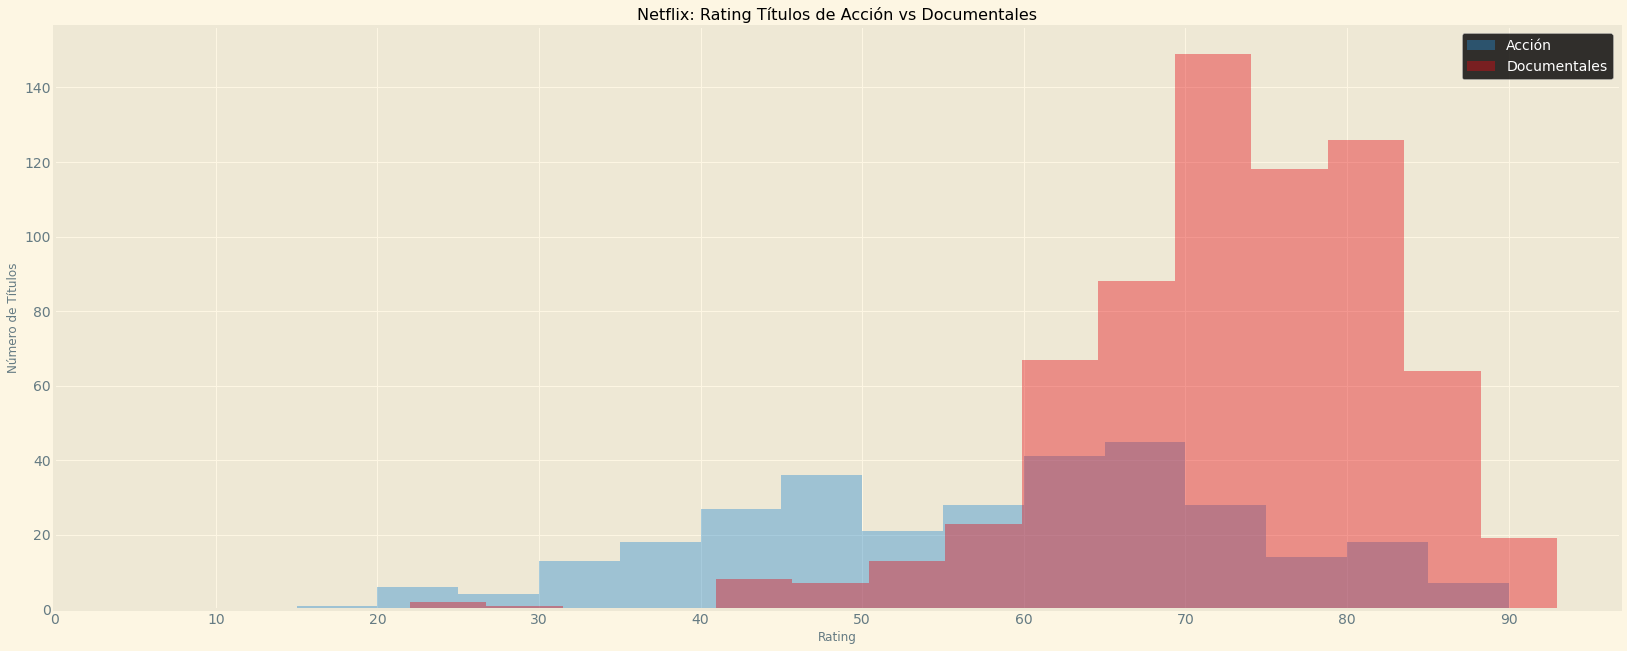

In [ ]:

plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(25,10)

ax.hist(periodo_accion_rating, bins = 15, alpha = 0.4, label = 'Acción')
ax.hist(periodo_docs_rating, bins = 15, alpha = 0.4, label = 'Documentales',color = color_Netflix )

xinterval = np.arange(0,100,10)
ax.set_xticks(xinterval)

ax.set_title('Netflix: Rating Títulos de Acción vs Documentales',  fontdict= {"color":"black"})
ax.legend(facecolor ="black")
ax.set_xlabel('Rating')
ax.set_ylabel('Número de Títulos')
plt.show()

In [ ]:
print(np.sqrt(accion.rating.shape[0]))
print(np.sqrt(docs.rating.shape[0]))

29.765752132274432
34.713109915419565


### Creamos un gráfico de Caja

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


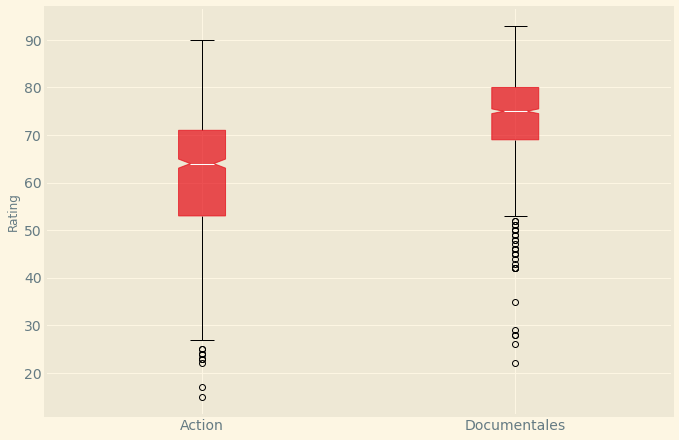

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(10,7)

ax.boxplot([accion.rating, docs.rating], notch = True, patch_artist = True, boxprops=dict(facecolor=color_Netflix, color=color_Netflix, alpha = 0.7), medianprops=dict(color='white'))
ax.set_xticklabels(['Action', 'Documentales'])
ax.set_ylabel('Rating')
plt.show()


#PARTE 2 PROYECTO

Proyecto parte 2: Segmentar por período de tiempo, por género y crearás tus gráficos específicos
Crearás 2 tableros, uno comparando la media de rating de los géneros que escogiste usando boxplots, y otro creando un gráfico de dispersión para determinar si la duración para cada uno de los géneros que escogiste previamente tienen alguna relación con el rating. Todo esto segmentado dentro del período de tiempo que te interese.

In [ ]:
periodo_accion = periodo[periodo["genero"] == 'Action']
periodo_docs = periodo[periodo["genero"] == 'Documentary']
periodo_comedia = periodo[periodo["genero"] == 'Comedy']
periodo_drama = periodo[periodo["genero"] == 'Drama']

In [ ]:
periodo_accion_rating = periodo_accion.rating
periodo_docs_rating = periodo_docs.rating
periodo_comedia_rating = periodo_comedia.rating
periodo_drama_rating  = periodo_drama.rating

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


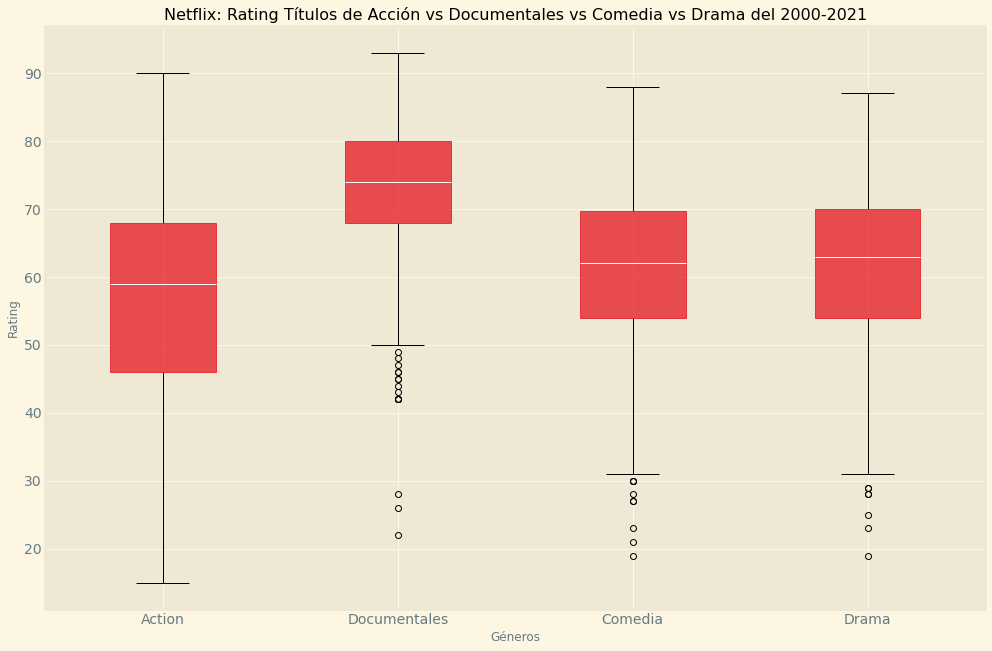

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(15,10)

ax.boxplot([periodo_accion_rating, periodo_docs_rating,periodo_comedia_rating,periodo_drama_rating], patch_artist = True, boxprops=dict(facecolor=color_Netflix, color=color_Netflix, alpha = 0.7), medianprops=dict(color='white'))
ax.set_xticklabels(['Action', 'Documentales', 'Comedia','Drama'])
ax.set_title('Netflix: Rating Títulos de Acción vs Documentales vs Comedia vs Drama del 2000-2021',  fontdict= {"color":"black"})
ax.set_ylabel('Rating')
ax.set_xlabel('Géneros')
plt.show()

###Creamos un Gráfico de Dispersión

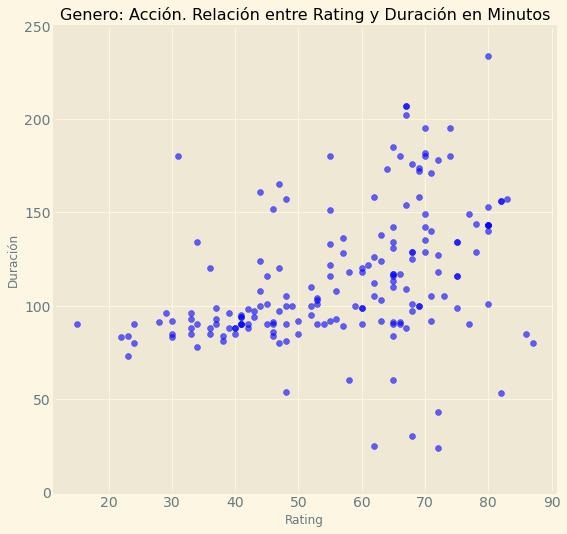

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(periodo_accion_rating,periodo_accion.duracion_minutos, alpha = 0.6,  color = 'blue')
ax.set_ylim(0,250)


ax.set_xlabel('Rating')
ax.set_ylabel('Duración')
ax.set_title('Genero: Acción. Relación entre Rating y Duración en Minutos', fontdict= {"color":"black"})

plt.show()

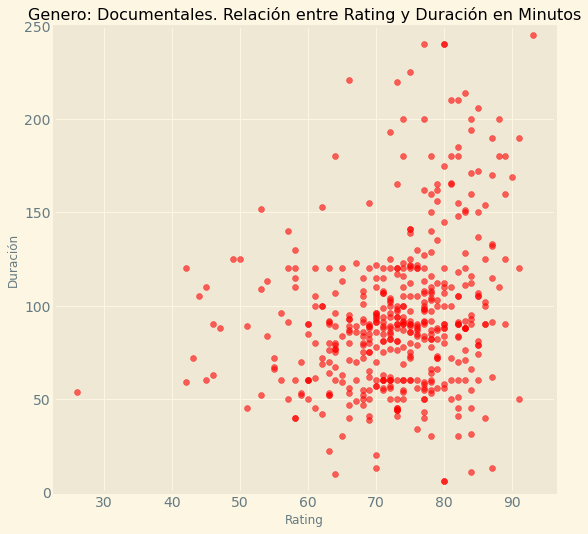

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(periodo_docs_rating,periodo_docs.duracion_minutos, alpha = 0.6,  color = 'red')
ax.set_ylim(0,250)


ax.set_xlabel('Rating')
ax.set_ylabel('Duración')
ax.set_title('Genero: Documentales. Relación entre Rating y Duración en Minutos', fontdict= {"color":"black"})

plt.show()

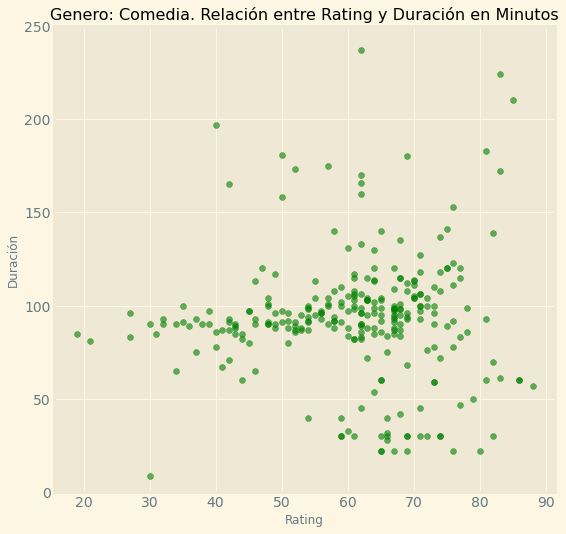

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(periodo_comedia_rating,periodo_comedia.duracion_minutos, alpha = 0.6,  color = 'green')
ax.set_ylim(0,250)


ax.set_xlabel('Rating')
ax.set_ylabel('Duración')
ax.set_title('Genero: Comedia. Relación entre Rating y Duración en Minutos', fontdict= {"color":"black"})

plt.show()

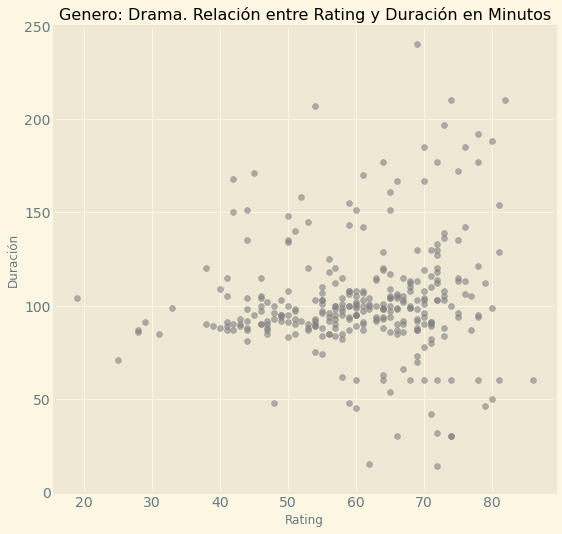

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.scatter(periodo_drama_rating,periodo_drama.duracion_minutos, alpha = 0.6,  color = 'gray')
ax.set_ylim(0,250)


ax.set_xlabel('Rating')
ax.set_ylabel('Duración')
ax.set_title('Genero: Drama. Relación entre Rating y Duración en Minutos', fontdict= {"color":"black"})

plt.show()

#Módulo 5: Automatizar y Compartir tus Visualizaciones

In [ ]:
periodo_col_gen = periodo['genero'].sort_values()

periodo_col_gen

4675    Action
4904    Action
2294    Action
2302    Action
4902    Action
         ...  
1641     Sport
503      Sport
4896     Sport
4487     Sport
3805     Sport
Name: genero, Length: 2859, dtype: object

In [ ]:
periodo_gen = periodo_col_gen.unique()

periodo_gen

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Musical',
       'Mystery', 'Reality-TV', 'Short', 'Sport'], dtype=object)

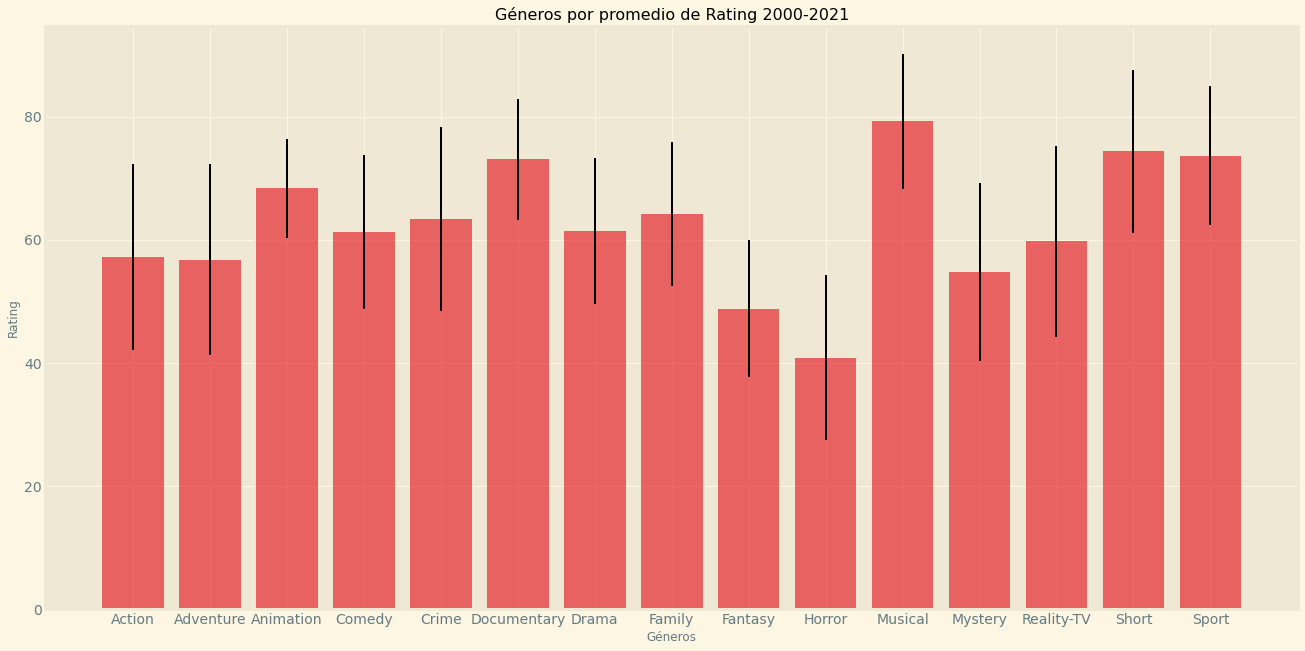

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(20,10)

for gen in periodo_gen:
  data_periodo = periodo[periodo['genero'] == gen]
  ax.bar(gen,data_periodo['rating'].mean(), yerr = data_periodo['rating'].std(), color = color_Netflix, alpha = 0.6)

ax.set_ylabel('Rating')
ax.set_xticklabels(periodo_gen, rotation=0)
ax.set_xlabel('Géneros')
ax.set_title('Géneros por promedio de Rating 2000-2021', fontdict= {"color":"black"})
plt.show()





In [ ]:
#GUARDAR EL GRÁFICO
fig.savefig('Géneros por Rating con Desviación Estándar.jpeg', dpi = 100)

#DPI : dots per inch, puntos por pulgada. Limitaciones de tamaño 100, más grande 300 o 500.
/content/Géneros por Rating con Desviación Estándar.jpeg

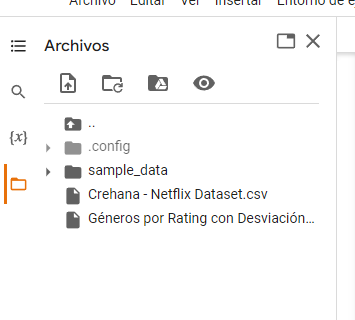

#GRÁFICO EXTRA

In [ ]:
periodo

,titulo,año,tipo,genero,rating,votos,pais,idioma,duracion_minutos,director
0,Dinosaur Planet,2003,mini series,Documentary,77,474.0,United States,English,50.0,NaN
1,Character,2021,movie,Crime,83,46.0,Japan,Japanese,125.0,Akira Nagai
3,The Rise and Fall of El Chapo,2016,movie,Documentary,69,42.0,United States,English,85.0,NaN
5,What the #$*! Do We (K)now!?,2004,movie,Documentary,53,13432.0,United States,English,109.0,William Arntz
7,The Fighter,2010,movie,Documentary,78,351199.0,United States,English,116.0,David O. Russell
...,...,...,...,...,...,...,...,...,...,...
6936,Out of Order,2003,mini series,Drama,69,712.0,United States,English,NaN,NaN
6938,On the Ropes,2018,mini series,Drama,68,108.0,Australia,English,NaN,NaN
6939,Licensed by Royalty,2003,series,Animation,64,44.0,Japan,Japanese,NaN,NaN
6942,Lightning Bug,2004,movie,Drama,65,1304.0,United States,English,NaN,Robert Hall


In [ ]:
periodo["genero"].value_counts()

Documentary    685
Comedy         490
Drama          466
Animation      326
Action         307
Musical        138
Crime          119
Horror         104
Short           63
Adventure       43
Sport           38
Family          35
Reality-TV      22
Fantasy         18
Mystery          5
Name: genero, dtype: int64

In [ ]:
eje_x = periodo["genero"].unique()
eje_x

array(['Documentary', 'Crime', 'Drama', 'Animation', 'Short', 'Horror',
       'Comedy', 'Sport', 'Musical', 'Action', 'Adventure', 'Fantasy',
       'Reality-TV', 'Family', 'Mystery'], dtype=object)

In [ ]:
eje_y = periodo["genero"].value_counts()
eje_y

Documentary    685
Comedy         490
Drama          466
Animation      326
Action         307
Musical        138
Crime          119
Horror         104
Short           63
Adventure       43
Sport           38
Family          35
Reality-TV      22
Fantasy         18
Mystery          5
Name: genero, dtype: int64

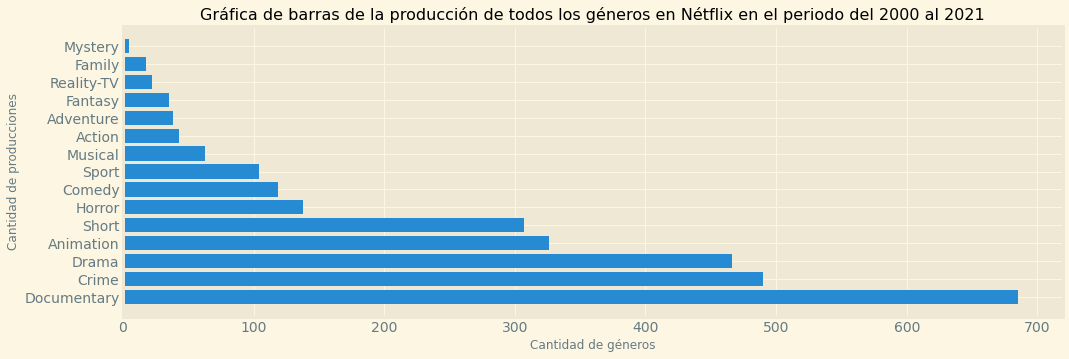

In [ ]:
plt.style.use('Solarize_Light2')
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

plt.barh(eje_x, eje_y)
plt.title ('Gráfica de barras de la producción de todos los géneros en Nétflix en el periodo del 2000 al 2021',fontdict= {"color":"black"})
plt.ylabel('Cantidad de producciones')
plt.xlabel('Cantidad de géneros')

plt.show()